In [1]:
from fastai.vision import *

In [2]:
path = Path('images')

NameError: name 'Path' is not defined

In [3]:
path.ls()

[PosixPath('glassy/glassy'),
 PosixPath('glassy/choppy'),
 PosixPath('glassy/models'),
 PosixPath('glassy/.ipynb_checkpoints')]

In [4]:
np.random.seed(420)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [5]:
data.classes

['choppy', 'glassy']

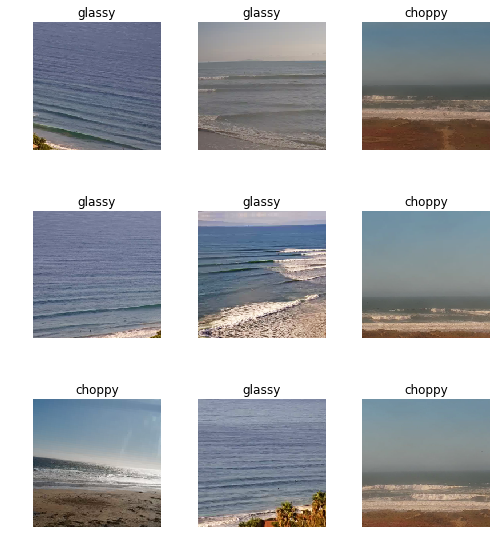

In [6]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 81122266.31it/s]


In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.682289,0.320140,0.122222,00:12
1,0.416155,0.123073,0.066667,00:12
2,0.273519,0.033619,0.000000,00:11
3,0.211677,0.013398,0.000000,00:11


In [9]:
learn.save('stage-1')

In [17]:
learn.unfreeze()

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


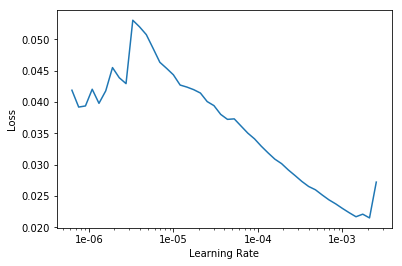

In [12]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(2, max_lr=slice(3e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.029639,0.008225,0.000000,00:11
1,0.027305,0.007461,0.000000,00:11


In [19]:
learn.save('stage-2')

In [20]:
learn.load('stage-2');

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

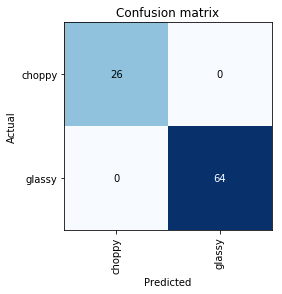

In [22]:
interp.plot_confusion_matrix()

In [23]:
learn.export()

In [24]:
defaults.device = torch.device('cpu')

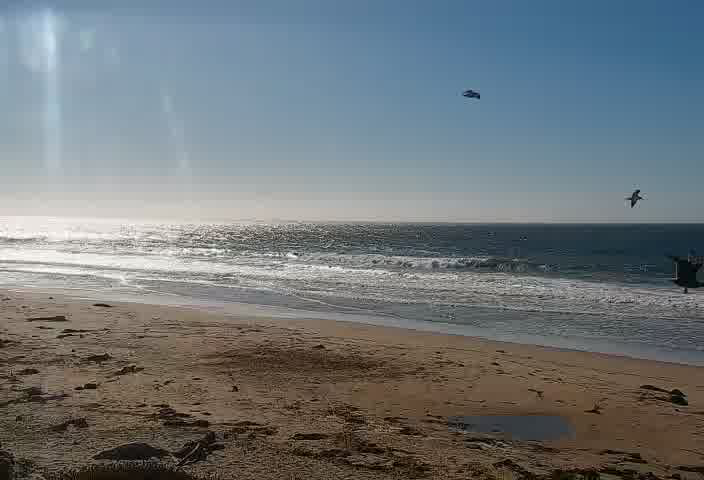

In [26]:
img = open_image(path/'choppy'/'1574746526_20191125T201924890_16.jpg')
img

In [27]:
learn = load_learner(path)

In [28]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category choppy